In [1]:
#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
#Read CSV file
df = pd.read_csv("crypto_data.csv")
df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
#Filter out the True values for IsTrading column
df_2 = df[df["IsTrading"]== True]
df_2.drop(columns = "IsTrading")
df_2

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [4]:
#Drop null values
df_2.dropna()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [5]:
#Filter for cryptocurrencies that have been mined
cryptocurrency_df = df_2[df_2["TotalCoinsMined"] > 0]
cryptocurrency_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [6]:
#Delete CoinName
crypto_df = cryptocurrency_df.drop(columns = ["CoinName", "Unnamed: 0"])
crypto_df

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,True,PoW/PoS,4.199995e+01,42
2,Scrypt,True,PoW/PoS,1.055185e+09,532000000
5,X13,True,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,True,PoW,1.792718e+07,21000000
8,Ethash,True,PoW,1.076842e+08,0
...,...,...,...,...,...
1238,SHA-256,True,DPoS,2.000000e+09,2000000000
1242,Scrypt,True,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,True,PoW,9.802226e+08,1400222610
1246,Equihash,True,PoW,7.296538e+06,21000000


In [7]:
#Change remaining columns to numerical
X = pd.get_dummies(crypto_df, columns = ['Algorithm', 'ProofType'])
X

,IsTrading,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,True,4.199995e+01,42,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,True,1.055185e+09,532000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,True,2.927942e+10,314159265359,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,True,1.792718e+07,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,True,1.076842e+08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,True,2.000000e+09,2000000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,True,1.493105e+07,250000000,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,True,9.802226e+08,1400222610,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,True,7.296538e+06,21000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
crypto_scaled = StandardScaler().fit_transform(X)

In [9]:
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(crypto_scaled)

crypto_pca.shape

(532, 74)

Preserving 90% of the explained variance change the number of featues from 99 columns to 74 columns

In [10]:
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

(532, 2)

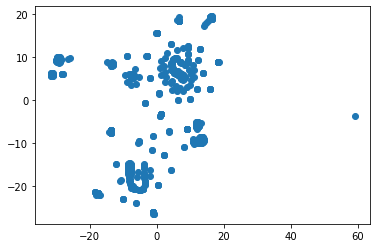

In [11]:
x_data = tsne_features[:,0]
y_data = tsne_features[:,1]

plt.scatter(x_data, y_data)
plt.show()

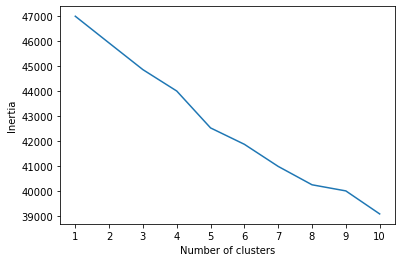

In [12]:
inertia = []

k = [1,2,3,4,5,6,7,8,9,10]
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(crypto_pca)
    inertia.append(km.inertia_)

elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Based on the elbow graph we cannot determine the k values. There are too many aspects to consider in this data frame that makes clustering difficult. By lowering the dimensions one can find the K values and number of the clusters.